# Dynamic Programming Exercises

**NOTICE:**
1. You are allowed to work in groups of up to three people but **have to document** your group's\
 members in the top cell of your notebook.
2. **Comment your code**, explain what you do (refer to the slides). It will help you understand the topics\
 and help me understand your thinking progress. Quality of comments will be graded. 
3. **Discuss** and analyze your results, **write-down your learnings**. These exercises are no programming\
 exercises it is about learning and getting a touch for these methods. Such questions might be asked in the\
 final exams. 
 4. Feel free to **experiment** with these methods. Change parameters think about improvements, write down\
 what you learned. This is not only about collecting points for the final grade, it is about understanding\
  the methods. 

### Exercise 1 - Manual Policy Evaluation 

**Summary:**
In this exercise you will manually calculate the state-value function for a very simple system.\
This will help you understand value-state functions and the algorithms we will use later to estimate such\
functions. 

**Provided Code:** No code is provided. 


**The Problem:**

See the slides of the lecture for a visual explanation. 

* We consider an environment with three states (S0, S1, S2) and two actions (left, right).
* Each action transitions between states in sequence: S0 <-> S1 <-> S2.
* The reward for entering a state is: S0 = 1, S1 = -1, S2 = 1.
* We follow  the policy:\
$\pi(\text{left} | \text{S0}) = 0$\
$\pi(\text{right} | \text{S0}) = 1$\
$\pi(\text{left} | \text{S1}) = 0.5$\
$\pi(\text{right} | \text{S1}) = 0.5$\
$\pi(\text{left} | \text{S2}) = 1$\
$\pi(\text{right} | \text{S2}) = 0$
* Each transition is deterministic, this means if we take action **left** in state **S1**, \
the probability of ending up in **S0** is 1 while the probability of ending up in **S2** is 0. 
* Rewards are deterministic, this means if we reach state **S0** we will receive a reward\
of 1 with probability of 1 and a reward of -1 with a probability of 0.




**Your Tasks in this exercise:**

1. Calculate (by hand) the state-value function of the given system under policy $\pi$:
    * For each state write down the formula from the slides (only consider terms with nonzero probability). 
    * Solve the resulting System of Linear Equations (hint: $v_\pi(S0), v_\pi(S1), v_\pi(S2)$ are your variables). 
    * Treat $\gamma$ as a constant unknown value (it's a hyperparameter).
    


2. Answer and Discuss:
    * What is the value of each state under $\gamma = 0.9$ ?
    * What happens if we pick $\gamma = 0.99$? Interpret the values.
    * What happens if we pick $\gamma = 0$? Interpret the values.
    * Explain what the value of a state tells us. 

Post your solution and answers here. 

### Exercise 2 - Iterative Policy Evaluation

**Summary:**


**Provided Code:** Use the ``Environment`` class and ``policy`` function provided below. 



**Your Tasks in this exercise:**

1. Implement the *Iterative Policy Evaluation* algorithm. 
    * Use the ``Environment`` class and ``policy`` function which are provided. 
2. Estimate the state-value function
    * Experiment with different values for $\theta$
    * Discuss and compare your estimates to your results achieved by exact calculation in the previous exercise. 

In [4]:
#@title **Provided Code:** ``Environment`` class and ``policy`` Function.
class Environment:

    def state_space(self):
        return [0,1,2]
    
    def non_terminal_state_space(self):
        return [0,1,2]
    
    def action_space(self):
        return ['left', 'right']
    
    def reward_space(self):
        return [-1, 1]

    def p(self, s_prime, r, s, a):
        ''' System dynamics of the toy world. This is all we need to evaluate the policy (i.e. estimate the state-value function).
            Usually we do not have this but we have a "simulated" environment instead. 
        '''
        if s == 0:
            # If we are in state S0, the only way to have all probabilities != 0 is a right move
            # with a reward of -1 and a resulting state of S1
            #
            if a == 'right' and s_prime == 1 and r == -1:
                return 1
            else:
                return 0
        
        if s == 2:
            # If we are in state S2, the only way to have all probabilities != 0 is a left move
            # with a reward of -1 and a resulting state of S1
            #
            if a == 'left' and s_prime == 1 and r == -1:
                return 1
            else:
                return 0
        
        if s == 1:
            # If we are in S1 we can either move left to S0 with a reward of 1
            # or right to S2 with a reward of 1
            if a =='left' and s_prime == 0 and r == 1:
                return 1
            if a == 'right' and s_prime == 2 and r == 1:
                return 1
            else:
                return 0
            
def policy(a, s):
    '''This function implements the policy (i.e.: for a given state s, it 
    returns the probability of taking action a).
    '''
    if s == 0:
        if a == 'right':
            return 1
        else:
            return 0
        
    if s == 1:
        # both actions have equal prob. in S1
        return 0.5
    
    if s == 2:
        if a == 'left':
            return 1
        else:
            return 0
        
    raise Exception('Unexpected action, state tuple: (%s, %d)' % (a, s))
        

In [6]:
# Write your code here. 

### Exercise 3 - Policy Iteration

**Summary:** In this exercise you will use policy iteration to find a policy that leads the little guy safely from\
itâ€™s start position to the goal. To do so we will use the FrozenLake-v1 environment provided by gymnasium which is\
a maintained fork of OpenAI's gym library.  


**Provided Code:** The ``FrozenLakeSystemDynamics`` class provides you with the required system transition probabilities\
needed by the algorithm (and all DP algorithms). It is not always possible to implement such a class. However in this\
example the system is easy enough to create such a model. Have a look at the class, useful functions will be
* ``p(s_prime, r, s, a)`` - transition probabilities
* ``nonterminal_state_space()`` - gives a list of nonterminal states
* ``state_space()`` - gives a list of all states
* ``action_space()`` - gives a list of actions
* ``reward_space()`` - gives a list of possible rewards

I also provide you with some helper functions to visualize and test your policies. The ``run_and_visualize_policy(env, pi, delay=0.175)``\
can be used to visualize the agent performing your policy. Use the ``test_policy(env, pi, iterations=500)`` function to evaluate\
the success rate of your policy over 500 iterations. 



**Your Tasks in this exercise:**

1. Implement the *Policy Iteration* algorithm to find an optimal policy. 
    * Use the ``FrozenLakeSystemDynamics`` object which will provide you with all information you need. 
    * **Notice:** The given environment is always solvable even if ``is_slippery`` is set to ``True``. 
    * **Hint:** During implementation it can be helpful to set ``is_slippery`` to ``False`` and use some smaller environments\
    (see https://gymnasium.farama.org/environments/toy_text/frozen_lake/#) for more information on how to do this. 
    
2. Run and Evaluate your Policy
    * Use the ``run_and_visualize_policy`` as well as the ``test_policy`` functions to check the found policy. 
    * Have a look at the state-value function estimation (V). Explain why the policy can always solve the specicif provided environment even if 
    it is slippery. 
    * Generate random environments (see the website on how to do this) and try to solve those. Is each environment solvable?
    


**Exercise 3 - Provided Code**

In [ ]:
# If you run on google-colab you have to install this package whenever you start a kernel
!pip install gymnasium

In [37]:
#@title **Provided Code:** ``FrozenLakeSystemDynamics`` class and ``run_and_visualize_policy``  and ``test_policy`` Function.
import numpy as np
import time
from IPython import display
import matplotlib.pyplot as plt

''' 
I had to write this class so we can use the environment using a DP approach 
(remember DP requires the p(s', r | s, a) function). This is usually not possible 
for more complex environments, we thereofre have to resort to other (but similar)
methods for solving those. 
'''
class FrozenLakeSystemDynamics:

    def __init__(self, env):
        assert env.spec.id == 'FrozenLake-v1', 'This class only supports the FrozenLake-v1 environment'

        # Map is always a square shape
        #
        self._n_rows = len(env.spec.kwargs['desc'])
        self._n_cols = len(env.spec.kwargs['desc'])
        self._parse_map_(env.spec.kwargs['desc'])
        if 'is_slippery' not in env.spec.kwargs:
            self._is_slippery = True # default true
        else:
            self._is_slippery = env.spec.kwargs['is_slippery']

    def _parse_map_(self, desc):
        # Map is always a square shape
        self._map = np.chararray((len(desc), len(desc)))
        self._nonterminal_states = []
        self._states = []


        for row_index, row_content in enumerate(desc):
            for col_index, content in enumerate(row_content):
                self._map[row_index, col_index] = content

                # Check if this is a terminal state
                #
                if content != 'G' and content != 'H':
                    self._nonterminal_states.append(self.sub2ind(row_index, col_index))
                
                self._states.append(self.sub2ind(row_index, col_index))
    
    def ind2sub(self, ind):
        # row, col
        return (ind // self._n_rows, ind % self._n_cols)

    def sub2ind(self, row, col):
        return self._n_cols * row + col

    def nonterminal_state_space(self):
        return self._nonterminal_states
    
    def state_space(self):
        return self._states
    
    def reward_space(self):
        return [0,1]
    
    def action_space(self):
        return [0,1,2,3]

    # 'left' : 0, 'right' : 2, 'down' : 1, 'up' : 3}
    def p(self, s_prime, reward, s, action):

        reward = int(reward)
        (r,c) = self.ind2sub(s)
        (r_p, c_p) = self.ind2sub(s_prime)
        
        # Compute possible outcomes
        #
        possible_s_prime = []

        if action == 0: # Left
            if c == 0: # agent is at the edge
                possible_s_prime.append(self.sub2ind(r,c)) # do not move
            else:
                possible_s_prime.append(self.sub2ind(r,c-1))

        if action == 2: # Right
            if c == self._n_cols - 1: # agent is at the edge
                possible_s_prime.append(self.sub2ind(r,c)) # do not move
            else:
                possible_s_prime.append(self.sub2ind(r,c+1))

        if action == 1: # Down
            if r == self._n_rows - 1: # agent is at the edge
                possible_s_prime.append(self.sub2ind(r,c)) # do not move
            else:
                possible_s_prime.append(self.sub2ind(r+1,c))
        
        if action == 3: # Up
            if r == 0: # agent is at the edge
                possible_s_prime.append(self.sub2ind(r,c)) # do not move
            else:
                possible_s_prime.append(self.sub2ind(r-1,c))

        
        # If it is slippery there is a 1/3 chance that we either move up or down
        # when taking action left or right.
        #
        if self._is_slippery and (action == 0 or action == 2):
            if r > 0:
                possible_s_prime.append(self.sub2ind(r-1, c)) # 1/3 chance to move up
            if r < self._n_rows-1:
                possible_s_prime.append(self.sub2ind(r+1 ,c)) # 1/3 chance to move down
            
            if r == 0 or r == self._n_rows-1:
                # if we are at an edge, there is a chance we will slip into the edge 
                # which will result in no movement.
                possible_s_prime.append(self.sub2ind(r,c)) 


        # If it is slippery there is a 1/3 chance that we either move left or right
        # when taking action up or down.
        #
        if self._is_slippery and (action == 1 or action == 3):
            if c > 0:
                possible_s_prime.append(self.sub2ind(r, c-1)) # 1/3 chance to move up
            if c < self._n_cols-1:
                possible_s_prime.append(self.sub2ind(r ,c+1)) # 1/3 chance to move down
            
            if c == 0 or c == self._n_cols-1:
                # if we are at an edge, there is a chance we will slip into the edge 
                # which will result in no movement.
                possible_s_prime.append(self.sub2ind(r,c)) 
                
        # If state is not reachable return 0 probability.
        #
        if s_prime not in possible_s_prime:
            return 0

        # Frozen lake returns either 0 or 1 reward.
        if reward not in [0,1]:
            return 0


        if s_prime in possible_s_prime:
            # If s_prime is the goal, we get reward 1.
            #
            if self._map[r_p, c_p] == b'G':
                if reward == 1:  
                    # If slippery we could end up in other spots. 
                    if self._is_slippery:
                        return 1.0 / 3
                    else:
                        return 1
                else:
                    return 0
            # If it is not the goal, we always get a reward of 0.
            if reward != 0:
                return 0
            else:
                if self._is_slippery:
                    return 1.0 / 3
                else:
                    return 1
                


def run_and_visualize_policy(env, pi, delay=0.175):
    ''' 
        Visualizes a policy. 
        env - FrozenLake-v1 environment.
        pi - A policy (i.e. a numpy.ndarray such that pi[state] = action).
    '''
    s, _ = env.reset()
    plt.imshow(env.render())

    while True:
        a = int(pi[s])
        s,_,terminated,truncated,_ = env.step(a)
        plt.imshow(env.render())
        plt.show()
        display.clear_output(wait=True)
        time.sleep(delay)

        if terminated or truncated:
            break

def test_policy(env, pi, iterations=500):
    ''' 
        Tests a policy. 
        env - FrozenLake-v1 environment.
        pi - A policy (i.e. a numpy.ndarray such that pi[state] = action).
    '''
    success_cnt = 0
    for it in range(iterations):
        s,_ = env.reset()
        while True:
            a = int(pi[s])
            s,reward,terminated,truncated,_ = env.step(a)

            if terminated == True or truncated == True:
                if int(reward) == 1:
                    success_cnt += 1
                break

                
    return 100 * (success_cnt / iterations)

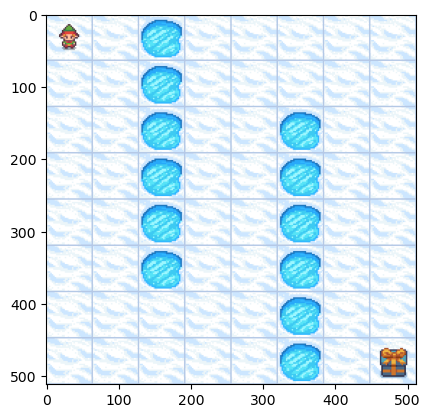

In [2]:
# This cell initializes the environment and the system dynamics object. 
#
import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import generate_random_map

env_slippery= gym.make('FrozenLake-v1', desc=['SFHFFFFF', 'FFHFFFFF', 'FFHFFHFF', 'FFHFFHFF','FFHFFHFF','FFHFFHFF','FFFFFHFF','FFFFFHFG'], is_slippery=True, render_mode='rgb_array')
env_slippery._max_episode_steps = 2000
envDynamics_slippery = FrozenLakeSystemDynamics(env_slippery)

env_slippery.reset()
plt.imshow(env_slippery.render())

In [56]:
test_policy(env_slippery, pi_pi)

100.0

### Exercise 4 - Value Iteration

**Summary:** In this exercise you will use **value iteration** to find a policy that leads the little guy safely from\
itâ€™s start position to the goal. To do so we will use the FrozenLake-v1 environment provided by gymnasium which is\
a maintained fork of OpenAI's gym library.  


**Provided Code:** In this exercise we will re-use the provided code of **Exercise-3**.

**Your Tasks in this exercise:**

1. Implement the *Value Iteration* algorithm to find an optimal policy. 
    * Use the ``FrozenLakeSystemDynamics`` object which will provide you with all information you need. 
    * **Notice:** The given environment is always solvable even if ``is_slippery`` is set to ``True``. 
    * **Hint:** During implementation it can be helpful to set ``is_slippery`` to ``False`` and use some smaller environments\
    (see https://gymnasium.farama.org/environments/toy_text/frozen_lake/#) for more information on how to do this. 
    
2. Run and Evaluate your Policy
    * Use the ``run_and_visualize_policy`` as well as the ``test_policy`` functions to check the found policy. 
    * Have a look at the state-value function estimation (V). Explain why the policy can always solve the specicif provided environment even if 
    it is slippery. 
    * Generate random environments (see the website on how to do this) and try to solve those. Is each environment solvable?
    
    

### Solution - Exercise 4

In [59]:
envDynamics = envDynamics_slippery

def value_iteration(envDynamics, theta=0.0001, gamma=0.9):

    terminal_states = set(envDynamics.state_space()) - set(envDynamics.nonterminal_state_space())

    # Initialize V(s) arbitrarily for nonterminal states
    V = np.random.randn(len(envDynamics.state_space()))

    # Initialize V(s) = 0 for terminal states
    for s in terminal_states:
        V[s] = 0

    pi = np.zeros(len(envDynamics.state_space()))

    while True:
        delta = 0
        for s in envDynamics.nonterminal_state_space():
            v = V[s]
            
            # Combined policy evaluation and policy improvement step
            expected_values = []
            for a in envDynamics.action_space():
                tmp = 0
                for s_prime in envDynamics.state_space():
                    for r in envDynamics.reward_space():
                        tmp = tmp + envDynamics.p(s_prime, r, s, a) * (r + gamma * V[s_prime])
            
                expected_values.append(tmp)

            # Update value estimate
            V[s] = np.max(expected_values)

            # Compute policy directly to avoid computing this again
            pi[s] = envDynamics.action_space()[np.argmax(expected_values)]

            delta = max(delta, abs(v - V[s]))
        if delta < theta:
            break
    
    return pi



In [63]:
pi_vi = value_iteration(envDynamics_slippery)
test_policy(env_slippery, pi_pi)

100.0

In [64]:
run_and_visualize_policy(env_slippery, pi_pi)

KeyboardInterrupt: 